adj_matrix = array([[0, 1, 0, 1],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [1, 0, 1, 0]])
degree_matrix = array([[2, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 2]])
laplacian_matrix = array([[ 2, -1,  0, -1],
       [-1,  2, -1,  0],
       [ 0, -1,  2, -1],
       [-1,  0, -1,  2]])
eigvals, eigvecs = (array([-7.54604712e-16,  2.00000000e+00,  2.00000000e+00,  4.00000000e+00]), array([[ 5.00000000e-01,  7.07106781e-01,  0.00000000e+00,
         5.00000000e-01],
       [ 5.00000000e-01, -1.77885755e-16, -7.07106781e-01,
        -5.00000000e-01],
       [ 5.00000000e-01, -7.07106781e-01,  2.87079964e-16,
         5.00000000e-01],
       [ 5.00000000e-01,  1.09194209e-16,  7.07106781e-01,
        -5.00000000e-01]]))
lambda_max = 3.9999999999999996
normalized_laplacian = array([[ 2.22044605e-16, -5.00000000e-01,  0.00000000e+00,
        -5.00000000e-01],
       [-5.00000000e-01,  2.22044605e-16, -5.00000000e-01,
         0.00000000e+00],
       [ 0.000000

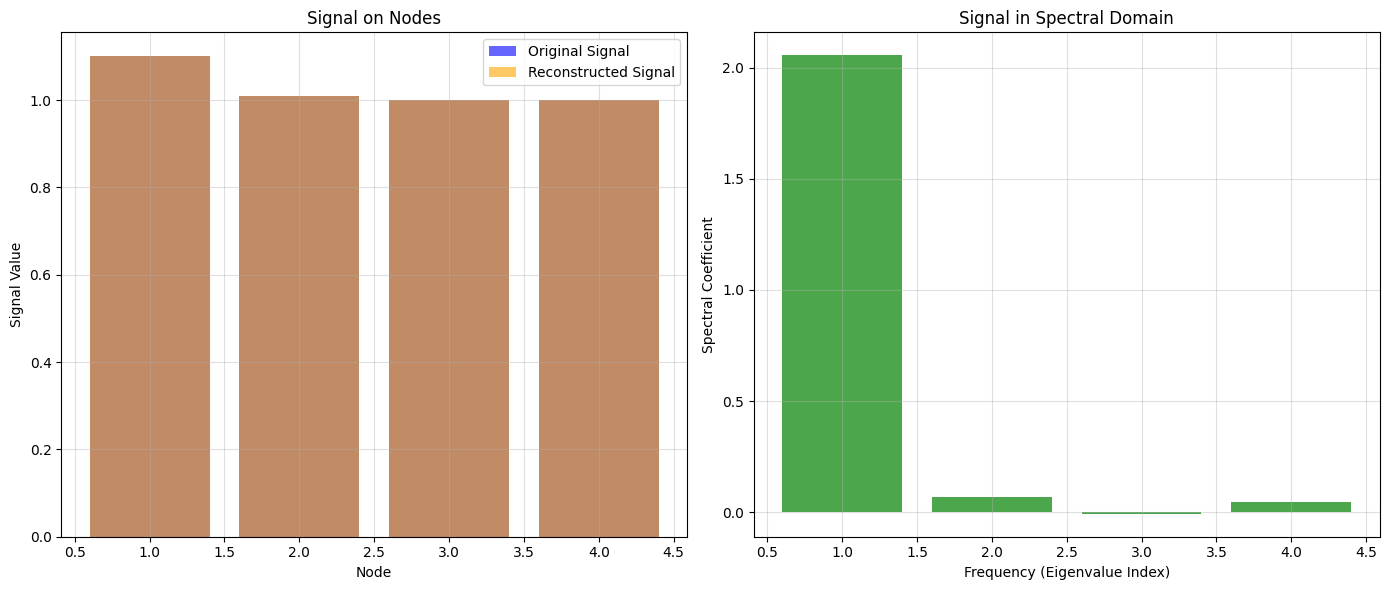

(array([1.1   , 1.01  , 1.001 , 1.0001]),
 array([ 2.05555   ,  0.07000357, -0.00700036,  0.04545   ]),
 array([1.1   , 1.01  , 1.001 , 1.0001]))

In [32]:
# Re-importing necessary libraries and re-initializing the example due to execution state reset
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Re-create the 4x4 graph and matrices
G = nx.cycle_graph(4)
adj_matrix = nx.adjacency_matrix(G).toarray()
print(f"{adj_matrix = }")
degree_matrix = np.diag(np.sum(adj_matrix, axis=1))
print(f"{degree_matrix = }")

laplacian_matrix = degree_matrix - adj_matrix
print(f"{laplacian_matrix = }")


# Normalize the Laplacian matrix
eigvals, eigvecs = np.linalg.eigh(laplacian_matrix)
print(f"{eigvals, eigvecs = }")

lambda_max = max(eigvals)
print(f"{lambda_max = }")
normalized_laplacian = 2 * laplacian_matrix / lambda_max - np.eye(4)
print(f"{normalized_laplacian = }")

# Original signal
x_signal = np.array([1.1, 1.01, 1.001, 1.0001])

# Fourier transform: Project signal onto eigenvector basis
x_hat = eigvecs.T @ x_signal  # Spectral representation
print(f"{x_hat = }")


# Inverse Fourier transform: Reconstruct the signal
x_reconstructed = eigvecs @ x_hat
print(f"{x_reconstructed = }")


# Visualize the signal in node and frequency domains
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot original and reconstructed signals on nodes
ax[0].bar(range(1, 5), x_signal, alpha=0.6, label="Original Signal", color="blue")
ax[0].bar(range(1, 5), x_reconstructed, alpha=0.6, label="Reconstructed Signal", color="orange")
ax[0].set_title("Signal on Nodes")
ax[0].set_xlabel("Node")
ax[0].set_ylabel("Signal Value")
ax[0].legend()
ax[0].grid(alpha=0.4)

# Plot signal in spectral domain
ax[1].bar(range(1, 5), x_hat, color="green", alpha=0.7)
ax[1].set_title("Signal in Spectral Domain")
ax[1].set_xlabel("Frequency (Eigenvalue Index)")
ax[1].set_ylabel("Spectral Coefficient")
ax[1].grid(alpha=0.4)

plt.tight_layout()
plt.show()

# Print values for clarity
x_signal, x_hat, x_reconstructed

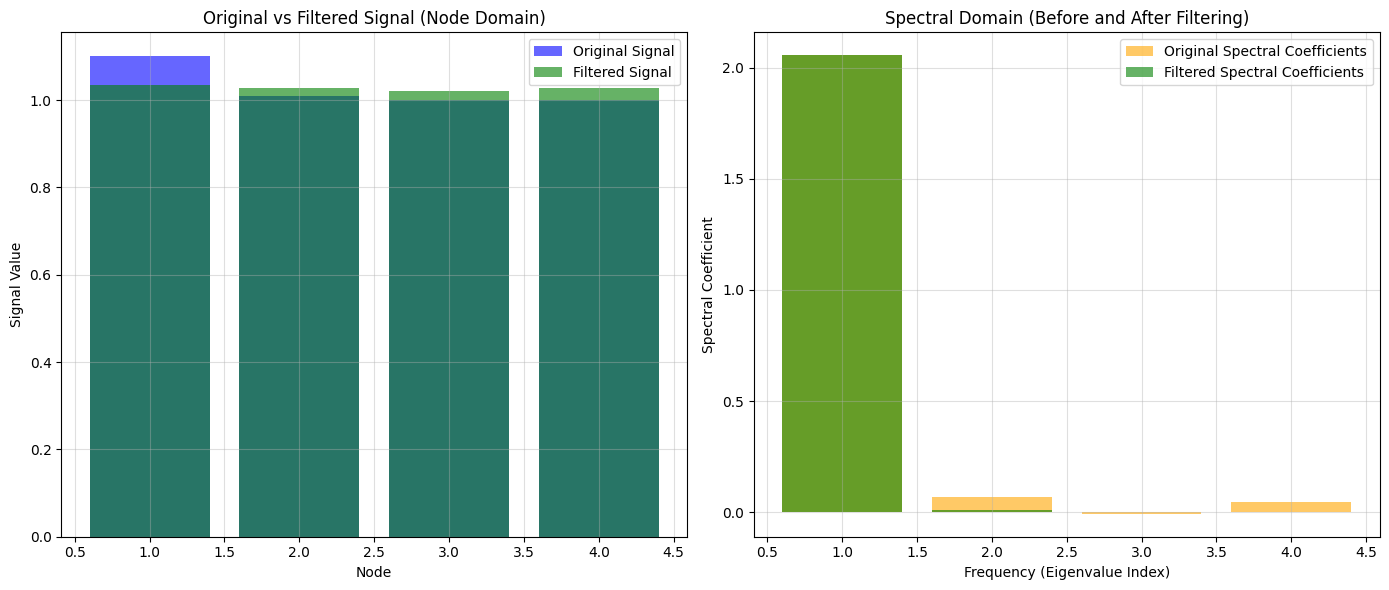

(array([1.03489032, 1.02802869, 1.02149213, 1.02668887]),
 array([ 2.05555000e+00,  9.47395315e-03, -9.47395315e-04,  8.32445787e-04]))

In [33]:
# Define a low-pass filter in the spectral domain (e.g., exponential decay for smoothing)
g_lambda = np.exp(-eigvals)  # Gaussian-like low-pass filter

# Apply the filter in the spectral domain
x_filtered_hat = g_lambda * x_hat

# Reconstruct the signal in the node domain using the filtered spectral coefficients
x_filtered = eigvecs @ x_filtered_hat

# Visualize the original, noisy, and filtered signals
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original vs Filtered signal on nodes
ax[0].bar(range(1, 5), x_signal, alpha=0.6, label="Original Signal", color="blue")
ax[0].bar(range(1, 5), x_filtered, alpha=0.6, label="Filtered Signal", color="green")
ax[0].set_title("Original vs Filtered Signal (Node Domain)")
ax[0].set_xlabel("Node")
ax[0].set_ylabel("Signal Value")
ax[0].legend()
ax[0].grid(alpha=0.4)

# Spectral coefficients before and after filtering
ax[1].bar(range(1, 5), x_hat, alpha=0.6, label="Original Spectral Coefficients", color="orange")
ax[1].bar(range(1, 5), x_filtered_hat, alpha=0.6, label="Filtered Spectral Coefficients", color="green")
ax[1].set_title("Spectral Domain (Before and After Filtering)")
ax[1].set_xlabel("Frequency (Eigenvalue Index)")
ax[1].set_ylabel("Spectral Coefficient")
ax[1].legend()
ax[1].grid(alpha=0.4)

plt.tight_layout()
plt.show()

# Print values for clarity
x_filtered, x_filtered_hat

In [34]:
# Define a Chebyshev polynomial filter for smoothing
def chebyshev_filter(L, x, K=3):
    """
    Apply Chebyshev polynomial filter to signal x on graph with Laplacian L.
    K: degree of the Chebyshev polynomial (controls smoothness).
    """
    # Initialize the filter result
    x_smooth = np.zeros_like(x)
    
    # Chebyshev polynomials: T_0(L) = I, T_1(L) = L
    T0 = np.eye(L.shape[0])
    T1 = L
    
    # Accumulate the sum of polynomials up to degree K
    # Chebyshev recurrence relation: T_k(L) = 2 * L * T_(k-1)(L) - T_(k-2)(L)
    for k in range(K + 1):
        if k == 0:
            Tk = T0
        elif k == 1:
            Tk = T1
        else:
            Tk = 2 * L @ T1 - T0  # Using the recurrence relation
            T0, T1 = T1, Tk
        
        # Add the contribution of each polynomial term to the filtered signal
        x_smooth += Tk @ x
    
    return x_smooth

# Apply Chebyshev filtering with K = 3
for i in range(10):
    x_smooth_chebyshev = chebyshev_filter(laplacian_matrix, x_signal, K=i)
    print(x_smooth_chebyshev)

# # Visualize the original and smoothed signals on nodes
# fig, ax = plt.subplots(figsize=(6, 4))

# # Plot original vs smoothed signal on nodes
# ax.bar(range(1, 5), x_signal, alpha=0.6, label="Original Signal", color="blue")
# ax.bar(range(1, 5), x_smooth_chebyshev, alpha=0.6, label="Smoothed Signal (Chebyshev)", color="green")
# ax.set_title("Original vs Smoothed Signal (Node Domain)")
# ax.set_xlabel("Node")
# ax.set_ylabel("Signal Value")
# ax.legend()
# ax.grid(alpha=0.4)

# plt.tight_layout()
# plt.show()

# Print smoothed signal
# x_smooth_chebyshev

[1.1    1.01   1.001  1.0001]
[1.2899 0.929  0.9929 0.8993]
[ 1.3131 -0.7686  0.3231 -0.8676]
[ 8.145  -6.1848  4.581  -6.5412]
[ 57.629  -48.3316  44.462  -49.6483]
[ 419.2409 -390.2326  370.2359 -395.1331]
[ 3190.9761 -3090.4614  3008.2221 -3108.7368]
[ 24743.97   -24368.9184  24062.058  -24437.1096]
[ 193397.87   -191996.1772  190853.075  -192250.6567]
[ 1517342.0879 -1512116.5894  1507844.9189 -1513066.3063]
